# Homework 2

Homework 2 is due on Monday, February 3.

## Written Part

**Problem 1:** Consider an $m\times n$ matrix $X$, an $m$-component vector $y$, and an $n$-component vector $\theta$. Suppose the matrix $X$ is tall and skinny, that is, suppose $m>n$. We saw in class the the gradient of the MSE cost function is proportional to $X^TX\theta-X^Ty = X^T(X\theta-y)$. This quantity can be computed two different ways: 

**Way 1:**
1. Compute the matrix product $X^TX$
2. Compute the matrix-vector product $(X^TX)\theta$
3. Compute the matrix-vector product $X^Ty$
4. Subtract the vector $X^Ty$ from the vector $(X^TX)\theta$

**Way 2:**
1. Compute the matrix-vector product $X\theta$
2. Subtract the vector $y$ from the vector $X\theta$
3. Compute the matrix-vector product $ X^T(X\theta-y)$

What would be the most efficient way in terms of operations (multiplications, additions, and subtractions) of computing it?

**Problem 2 (for M462 students):** Consider the function $f(x)=x^TMx$, where $x$ is a vector, and $M$ is an $n\times n$ matrix (possibly non-symmetric). Find the gradient of $f(x)$.  

**Problem 2 (for M562 students):** Consider two convex functions $f(x)$ and $g(x)$. Assume $g(x)$ is non-decresing. Show that the composite function $h(x)=g(f(x))$ is also convex.

**Problem 3:** Consider the MSE cost function $\mbox{MSE}(\theta)=\|y-X\theta\|_2^2$. Find the second-order partial derivatives matrix (the *Hessian matrix*)

$$
\begin{bmatrix}
\dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_1^2} & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_1\partial \theta_2} & \cdots & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_1\partial\theta_n} \\
\dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_2\partial \theta_1} & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_2^2} & \cdots & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_2\partial\theta_n} \\
\vdots & \vdots & \ddots & \vdots \\
\dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_n\partial \theta_1} & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_n\partial \theta_2} & \cdots & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial\theta_n^2}
\end{bmatrix}
$$

## Programming Part

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### The Iris Dataset

The *iris* dataset contains a bunch of measurements for 150 flowers representing three species of iris (setosa, versicolor and virginica).
For each flower, we have its petal length, petal width, sepal length, and sepal width, as well as its species.

In [2]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/iris.data'
iris_data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','species'])
iris_data.head(5) #first 5 rows

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Let us look at the scatterplots for each of the six pairs of measurements.

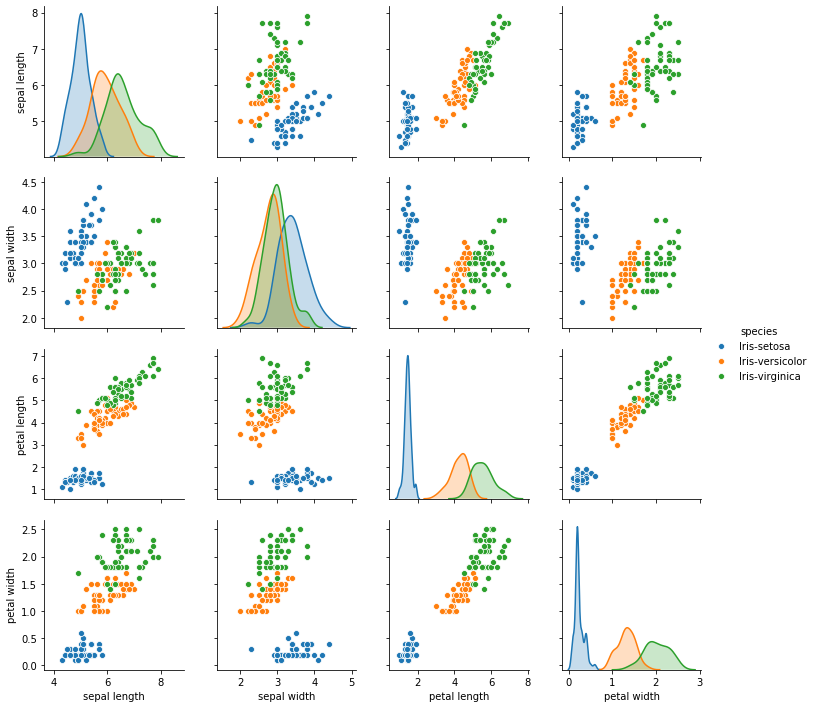

In [5]:
sns.pairplot(data=iris_data,hue='species')

### Assignments

**Part 1:** Add to the iris_data dataframe a new column called *target*. For each flower, set

$$
\mbox{target} = \left\{ \begin{array}{cc} 
1 & \mbox{ if species }=\mbox{ setosa},\\
0 & \mbox{ if species }\neq \mbox{ setosa}.
\end{array}\right.
$$

Hint: the easiest way to do is by using pandas.Series.map (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html)

In [28]:
'using loops'
target = np.zeros((len(iris_data),1))
for i in range(len(iris_data)):
    if iris_data['species'][i] == 'Iris-setosa':
        target[i]=1
iris_data['target'] = target
iris_data.head()

,sepal length,sepal width,petal length,petal width,species,target,target_predicted
0,5.1,3.5,1.4,0.2,Iris-setosa,1.0,1.0
1,4.9,3.0,1.4,0.2,Iris-setosa,1.0,1.0
2,4.7,3.2,1.3,0.2,Iris-setosa,1.0,1.0
3,4.6,3.1,1.5,0.2,Iris-setosa,1.0,1.0
4,5.0,3.6,1.4,0.2,Iris-setosa,1.0,1.0


In [34]:
iris_data = iris_data.drop(columns=['target','target_predicted'])
iris_data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
rule = {'Iris-setosa':1, 'Iris-versicolor':0,'Iris-virginica':0}
iris_data['target'] = iris_data['species'].map(rule)
iris_data.head()

,sepal length,sepal width,petal length,petal width,species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


**Part 2:** Use Gradient Descent to train a linear model for predicting the target values.

**Part 3:** Write a function for predicting whether the species of an iris flower is setosa or non-setosa. Your function must use the linear model from part 2 and follow the classification rule:
1. if the predicted target value is larger than or equal to 0.5, then the species is setosa.
2. if the predicted target value is less than 0.5, then the species is not setosa.

How many non-setosa iris flowers are correctly classified as non-setosa?

How many non-setosa iris flowers are misclassified as setosa?

In [4]:
classes = {"Iris-setosa": 1, "Iris-versicolor": 0, "Iris-virginica": 0}
iris_data['target'] = iris_data['species'].map(classes)
iris_data.head(10)

,sepal length,sepal width,petal length,petal width,species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
5,5.4,3.9,1.7,0.4,Iris-setosa,1
6,4.6,3.4,1.4,0.3,Iris-setosa,1
7,5.0,3.4,1.5,0.2,Iris-setosa,1
8,4.4,2.9,1.4,0.2,Iris-setosa,1
9,4.9,3.1,1.5,0.1,Iris-setosa,1


In [5]:
y = iris_data['target'].to_numpy(float)
y = y[:,None]
X = iris_data.iloc[:,0:4].to_numpy()

In [20]:
features = ['sepal length','sepal width','petal length','petal width']
X = iris_data[features]

In [6]:
theta = np.linalg.lstsq(X,y,rcond=None)[0]
theta

array([[ 0.08363363],
       [ 0.25334481],
       [-0.22515992],
       [-0.06983994]])

In [14]:
yy = X@theta
yy.shape

(150, 1)

In [16]:
target_predicted = np.zeros((len(y),1)) 
target_predicted[yy>0.5]=1

In [18]:
iris_data['target_predicted'] = target_predicted
iris_data.head(10)

,sepal length,sepal width,petal length,petal width,species,target,target_predicted
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1.0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1.0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1.0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1.0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1.0
5,5.4,3.9,1.7,0.4,Iris-setosa,1,1.0
6,4.6,3.4,1.4,0.3,Iris-setosa,1,1.0
7,5.0,3.4,1.5,0.2,Iris-setosa,1,1.0
8,4.4,2.9,1.4,0.2,Iris-setosa,1,1.0
9,4.9,3.1,1.5,0.1,Iris-setosa,1,1.0


In [12]:
np.linalg.norm(X@theta-y)/len(y)

0.011744743405391328

In [2]:
'Stochastic Gradient Descent with Momentum'
def linregression_SGDM(X,y,s,beta,n_iterations):
    m,n = X.shape #size of data set, number of features
    theta = np.random.randn(n,1) #random initialization
    it = 0
    MSE = np.zeros((n_iterations,1))
    
    d_current = np.zeros((n,1))
    d_previous = np.zeros((n,1))
    
    for iteration in range(n_iterations):
        for i in range(m):
            random_row = np.random.randint(m)
            xi = X[None,random_row] #keep xi as a row vector
            yi = y[random_row]
            d_current =  (-2*s/m)*xi.T@(xi@theta-yi) + beta*d_previous
            theta = theta + d_current
        MSE[iteration] = np.linalg.norm(X@theta-y)/m
        d_previous = d_current
    return theta, MSE

In [179]:
beta = 0#0.9
s = 0.07
n_iterations = 20
theta,MSE = linregression_GDM(X,y,s,beta,n_iterations)

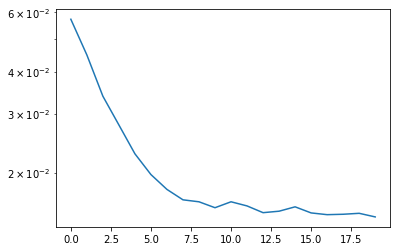

In [180]:
plt.semilogy(MSE)

In [181]:
np.linalg.norm(X@theta-y)/len(y)

0.014783803452325935

In [13]:
'Gradient Descent with Momentum'
def linregression_GDM(X,y,s,beta,n_iterations):
    m,n = X.shape #size of data set, number of features
    theta = np.random.randn(n,1) #random initialization
    it = 0
    MSE = np.zeros((n_iterations,1))
    
    d_current = np.zeros((n,1))
    d_previous = np.zeros((n,1))
    
    for iteration in range(n_iterations):
        d_current =  (-2*s/m)*X.T@(X@theta-y) + beta*d_previous
        theta = theta + d_current
        MSE[iteration] = np.linalg.norm(X@theta-y)/m
        d_previous = d_current
    return theta, MSE

In [77]:
beta = 0.7
s = 0.01
n_iterations = 20
theta,MSE = linregression_GDM(X,y,s,beta,n_iterations)

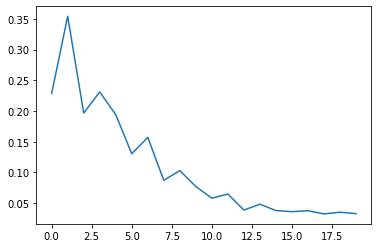

In [78]:
plt.plot(MSE)

In [79]:
MSE[-1]

array([0.03296834])

In [80]:
theta

array([[ 1.09243233],
       [-0.86824458],
       [-1.25426251],
       [ 1.04744339]])